Connect to Neo4j instance using the [Py2neo Python Library v3](http://py2neo.org/3/)

In [1]:
from py2neo import Graph, authenticate

authenticate("192.168.99.100:7474", "neo4j", "itsyoubob")
graph = Graph("http://192.168.99.100:7474/db/data/")

Use a Cypher query find the tweet date range and print the results.

In [2]:
query = """
MATCH (t:Tweet)
WHERE EXISTS (t.created_at)
RETURN MIN(t.created_at), MAX(t.created_at)
"""

date_range = graph.run(query)

print date_range.dump()

 MIN(t.created_at)               MAX(t.created_at)              
----------------------------------------------------------------
 Wed Sep 09 04:13:06 +0000 2015  Wed Sep 09 14:49:23 +0000 2015 
None


Find the top 25 hashtags and import the results into a [Pandas](http://pandas.pydata.org/) DataFrame.

In [9]:
import pandas 

query = """
MATCH (h:Hashtag)-[:TAGS]->(t:Tweet)         
RETURN h.name AS hashtag, COUNT(t) AS tweets 
ORDER BY tweets DESC LIMIT 25
"""

top_hashtags = graph.run(query)

top_hashtags_df = pandas.DataFrame(top_hashtags.__iter__(), columns=top_hashtags.keys())
top_hashtags_df

,hashtag,tweets
0,health,3051
1,lateshow,1383
2,tcot,1010
3,irandeal,927
4,news,699
5,lssc,671
6,hillaryoniran,656
7,job,599
8,trump,597
9,jobs,549


Use matplotlib to plot the top 25 hashtags as a bar graph.

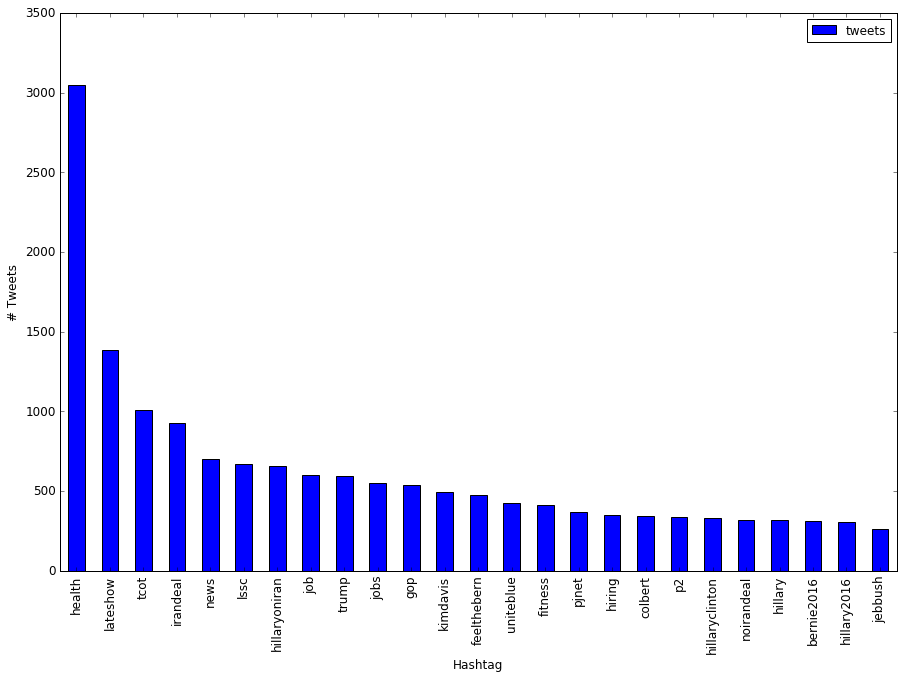

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()
ax = top_hashtags_df.plot(kind='bar', figsize=(15,10), legend=True, fontsize=12)
ax.set_xticklabels(top_hashtags_df["hashtag"])
ax.set_xlabel("Hashtag", fontsize=12)
ax.set_ylabel("# Tweets", fontsize=12)
plt.show()